In [138]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import missingno as msno 
from datetime import datetime 
import glob
import json 
import os 
from pathlib import Path 
import re 
from IPython.display import HTML, display
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [140]:
df = pd.read_csv('C:\\Users\\edgarcia\\.env\\Scripts\\CienciaDatos_CodigoFacilito\\Datos_propuestos\\dengue_features_train.csv')
df_labels_train = pd.read_csv('C:\\Users\\edgarcia\\.env\\Scripts\\CienciaDatos_CodigoFacilito\\Datos_propuestos\\dengue_labels_train.csv')

df_casos = df_labels_train['total_cases']
df_casos

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [141]:
df = pd.concat([df, df_casos], axis=1)
df


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                73.365714                         12.42   
1                                77.368571                         22.82   
2                                82.052857                         34.54   
3                                80.337143                         15.36   
4                                80.460000                          7.52   
...                                    ...                           ...   
1451                             88.765714                         55.30   
1452                             91.600000                         86.47   
1453                             94.280000                         58.94   
1454                             94.660000                         59.67   
1455                             89.082857                         63.22   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                 14.012857           2.628571   
1                                 15.372857           2.371429   
2                                 16.848571           2.300000   
3                                 16.672857           2.428571   
4                                 17.210000           3.014286   
...                                     ...                ...   
1451                              18.485714           9.800000   
1452                              18.070000           7.471429   
1453                              17.008571           7.500000   
1454                              16.815714           7.871429   
1455                              17.355714          11.014286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0              25.442857                 6.900000                29.4   
1              26.714286                 6.371429                31.7   
2              26.714286                 6.485714                32.2   
3              27.471429                 6.771429                33.3   
4              28.942857                 9.371429                35.0   
...                  ...                      ...                 ...   
1451           28.633333                11.933

In [142]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

In [143]:
#Rename Columns 
columns_names ={  
                'city' : 'City',
                'year' : 'Year',
                'weekofyear' : 'Week of year',
                'week_start_date' : 'Week Start Date',
                'station_max_temp_c' : 'Maximum temperature',
                'station_min_temp_c' : 'Minimum temperature',
                'station_avg_temp_c' : 'Average temperature',
                'station_precip_mm' : 'Total precipitation (GHCN)', #Global Historical Climatology Network
                'station_diur_temp_rng_c' : 'Diurnal temperature range(GHCN)',
                'precipitation_amt_mm' : 'Total precipitation (PERSIANN)', #Precipitation Estimation from Remotely Sensed Information using Artificial Neural Networks
                'reanalysis_sat_precip_amt_mm' : 'Total precipitation (NCEP)', #National Centers for Environmental Prediction
                'reanalysis_dew_point_temp_k' : 'Mean dew point temperature',
                'reanalysis_air_temp_k' : 'Mean air temperature',
                'reanalysis_relative_humidity_percent' : 'Mean relative humidity',
                'reanalysis_specific_humidity_g_per_kg' : 'Mean specific humidity',
                'reanalysis_precip_amt_kg_per_m2' : 'Total precipitation (NCEP in kg/m2)',
                'reanalysis_max_air_temp_k' : 'Maximum air temperature',
                'reanalysis_min_air_temp_k' : 'Minimum air temperature',
                'reanalysis_avg_temp_k' : 'Average air temperature',
                'reanalysis_tdtr_k' : 'Diurnal temperature range (NCEP)',
                'ndvi_se' : 'Pixel southeast of city centroid',
                'ndvi_sw' : 'Pixel southwest of city centroid',
                'ndvi_ne' : 'Pixel northeast of city centroid',
                'ndvi_nw' : 'Pixel northwest of city centroid'}
df = df.rename(columns = columns_names)

In [144]:
print('El DataFrame tiene', len(df), 'filas y', len(df.columns), 'Columnas ', '\n')
print(df.info(), '\n')
print(df.columns, '\n')
df.describe()


El DataFrame tiene 1456 filas y 25 Columnas  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   City                                 1456 non-null   object        
 1   Year                                 1456 non-null   int64         
 2   Week of year                         1456 non-null   int64         
 3   Week Start Date                      1456 non-null   datetime64[ns]
 4   Pixel northeast of city centroid     1262 non-null   float64       
 5   Pixel northwest of city centroid     1404 non-null   float64       
 6   Pixel southeast of city centroid     1434 non-null   float64       
 7   Pixel southwest of city centroid     1434 non-null   float64       
 8   Total precipitation (PERSIANN)       1443 non-null   float64       
 9   Mean air temperature                 1

Year  Week of year  Pixel northeast of city centroid  \
count  1456.000000   1456.000000                       1262.000000   
mean   2001.031593     26.503434                          0.142294   
std       5.408314     15.019437                          0.140531   
min    1990.000000      1.000000                         -0.406250   
25%    1997.000000     13.750000                          0.044950   
50%    2002.000000     26.500000                          0.128817   
75%    2005.000000     39.250000                          0.248483   
max    2010.000000     53.000000                          0.508357   

       Pixel northwest of city centroid  Pixel southeast of city centroid  \
count                       1404.000000                       1434.000000   
mean                           0.130553                          0.203783   
std                            0.119999                          0.073860   
min                           -0.456100                         -0.015533   
25%                            0.049217                          0.155087   
50%                            0.121429                          0.196050   
75%                            0.216600                          0.248846   
max                            0.454429                          0.538314   

       Pixel southwest of city centroid  Total precipitation (PERSIANN)  \
count                       1434.000000                     1443.000000   
mean                           0.202305                       45.760388   
std                            0.083903                       43.715537   
min                           -0.063457                        0.000000   
25%                            0.144209                        9.800000   
50%                            0.189450                       38.340000   
75%                            0.246982                       70.235000   
max                            0.546017                      390.600000   

       Mean air temperature  Average air temperature  \
count           1446.000000              1446.000000   
mean             298.701852               299.225578   
std                1.362420                 1.261715   
min              294.635714               294.892857   
25%              297.658929               298.257143   
50%              298.646429               299.289286   
75%              299.833571               300.207143   
max              302.200000               302.928571   

       Mean dew point temperature  ...  Mean relative humidity  \
count                 1446.000000  ...             1446.000000   
mean                   295.246356  ...               82.161959   
std                      1.527810  ...                7.153897   
min                    289.642857  ...               57.787143   
25%                    294.118929  ...               77.177143   
50%                    295.640714  ...               80.301429   
75%                    296.460000  ...               86.357857   
max                    298.450000  ...               98.610000   

       Total precipitation (NCEP)  Mean specific humidity  \
count                 1443.000000             1446.000000   
mean                    45.760388               16.746427   
std                     43.715537                1.542494   
min                      0.000000               11.715714   
25%                      9.800000               15.557143   
50%                     38.340000               17.087143   
75%                     70.235000               17.978214   
max                    390.600000               20.461429   

       Diurnal temperature range (NCEP)  Average temperature  \
count                       1446.000000          1413.000000   
mean                           4.903754            27.185783   
std                            3.546445             1.292347   
min                            1.357143            21.400000   
25%                            2.328571    

In [145]:
df[df.duplicated()]

Empty DataFrame
Columns: [City, Year, Week of year, Week Start Date, Pixel northeast of city centroid, Pixel northwest of city centroid, Pixel southeast of city centroid, Pixel southwest of city centroid, Total precipitation (PERSIANN), Mean air temperature, Average air temperature, Mean dew point temperature, Maximum air temperature, Minimum air temperature, Total precipitation (NCEP in kg/m2), Mean relative humidity, Total precipitation (NCEP), Mean specific humidity, Diurnal temperature range (NCEP), Average temperature, Diurnal temperature range(GHCN), Maximum temperature, Minimum temperature, Total precipitation (GHCN), total_cases]
Index: []

[0 rows x 25 columns]

## Revisando Datos NaN

In [146]:
print('Tamaño del DataFrame con valores nulos: ', df.index.size)
print('Tamaño del DataFrame con SIN valores nulos: ', len(df.dropna()))
#Se observa que si hay valores NaN

Tamaño del DataFrame con valores nulos:  1456
Tamaño del DataFrame con SIN valores nulos:  1199


<Axes: >

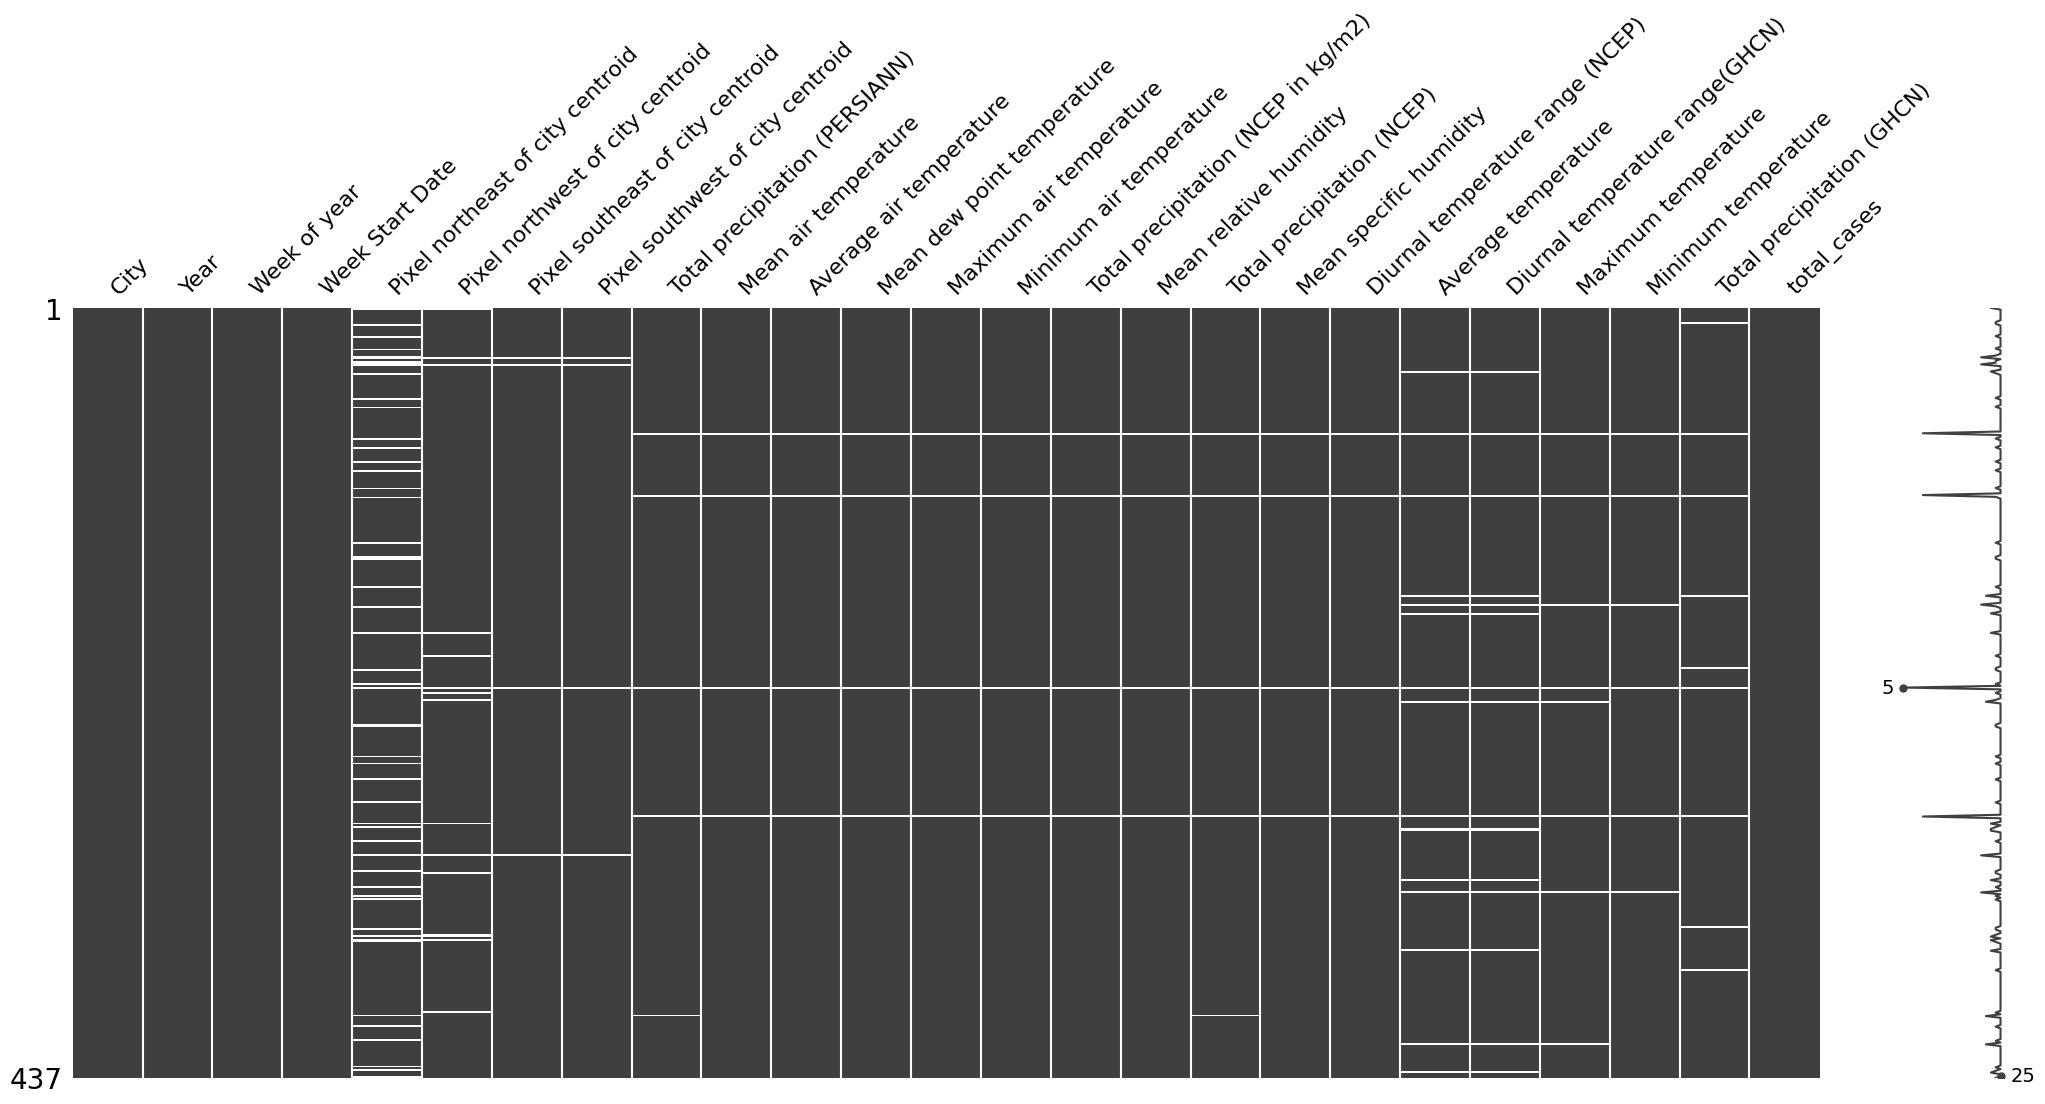

In [147]:
#Graficamos los valors NaN
msno.matrix(df.sample(frac=0.3))

In [148]:
dif = df.index.size - len(df.dropna())
pct_val_na = (dif * 100 ) / df.index.size
print('Se tiene que el porcentaje de valores nulos es: ', f'{pct_val_na:.2f}', '%' )  
pd.isnull(df).sum()



Se tiene que el porcentaje de valores nulos es:  17.65 %


City                                     0
Year                                     0
Week of year                             0
Week Start Date                          0
Pixel northeast of city centroid       194
Pixel northwest of city centroid        52
Pixel southeast of city centroid        22
Pixel southwest of city centroid        22
Total precipitation (PERSIANN)          13
Mean air temperature                    10
Average air temperature                 10
Mean dew point temperature              10
Maximum air temperature                 10
Minimum air temperature                 10
Total precipitation (NCEP in kg/m2)     10
Mean relative humidity                  10
Total precipitation (NCEP)              13
Mean specific humidity                  10
Diurnal temperature range (NCEP)        10
Average temperature                     43
Diurnal temperature range(GHCN)         43
Maximum temperature                     20
Minimum temperature                     14
Total preci

In [149]:
#Se observa que una parte de datos faltantes corresponden a las semanas 53, por lo cual se investiga si esos años tuvieron 53 semanas
#1993: 52 semanas
#1999: 52 semanas
#2005: 53 semanas
#2010: 52 semanas
#Por lo tanto se toma la decisión de eliminar esas filas del DataFrame 
df.loc[df['Week of year']== 53]

City  Year  Week of year Week Start Date  \
139    sj  1993            53      1993-01-01   
451    sj  1999            53      1999-01-01   
763    sj  2005            53      2005-01-01   
1170   iq  2005            53      2005-01-01   
1430   iq  2010            53      2010-01-01   

      Pixel northeast of city centroid  Pixel northwest of city centroid  \
139                                NaN                               NaN   
451                                NaN                               NaN   
763                                NaN                               NaN   
1170                               NaN                               NaN   
1430                               NaN                               NaN   

      Pixel southeast of city centroid  Pixel southwest of city centroid  \
139                                NaN                               NaN   
451                                NaN                               NaN   
763                                NaN                               NaN   
1170                               NaN                               NaN   
1430                               NaN                               NaN   

      Total precipitation (PERSIANN)  Mean air temperature  ...  \
139                              NaN                   NaN  ...   
451                              NaN                   NaN  ...   
763                              NaN                   NaN  ...   
1170                             NaN                   NaN  ...   
1430                             NaN                   NaN  ...   

      Mean relative humidity  Total precipitation (NCEP)  \
139                      NaN                         NaN   
451                      NaN                         NaN   
763                      NaN                         NaN   
1170                     NaN                         NaN   
1430                     NaN                         NaN   

      Mean specific humidity  Diurnal temperature range (NCEP)  \
139                      NaN                               NaN   
451                      NaN                               NaN   
763                      NaN                               NaN   
1170                     NaN                               NaN   
1430                     NaN                               NaN   

      Average temperature  Diurnal temperature range(GHCN)  \
139                   NaN                              NaN   
451                   NaN                              NaN   
763                   NaN                              NaN   
1170                  NaN                              NaN   
1430                  NaN                              NaN   

      Maximum temperature  Minimum temperature  Total precipitation (GHCN)  \
139                   NaN                  NaN                         NaN   
451                   NaN                  NaN                         NaN   
763                   NaN                  NaN                         NaN   
1170                  NaN                  NaN                         NaN   
1430                  NaN                  NaN                         NaN   

      total_cases  
139            30  
451            59  
763            10  
1170            9  
1430            0  

[5 rows x 25 columns]

In [150]:
copia_df = df.copy()
print(copia_df.shape)

copia_df.drop(copia_df.loc[copia_df['Week of year']== 53].index, inplace=True) #Se eliminan 5 filas 
print(copia_df.shape)

(1456, 25)
(1451, 25)


In [151]:
copia_df[copia_df['Mean air temperature'].isnull()]

City  Year  Week of year Week Start Date  \
87     sj  1992             1      1992-01-01   
399    sj  1998             1      1998-01-01   
711    sj  2004             1      2004-01-01   
1118   iq  2004             1      2004-01-01   
1378   iq  2009             1      2009-01-01   

      Pixel northeast of city centroid  Pixel northwest of city centroid  \
87                            0.125100                          0.157867   
399                           0.045500                          0.047800   
711                          -0.268300                         -0.123700   
1118                          0.202571                          0.198967   
1378                          0.151286                          0.161686   

      Pixel southeast of city centroid  Pixel southwest of city centroid  \
87                            0.185283                          0.181367   
399                           0.123986                          0.083443   
711                           0.223757                          0.176543   
1118                          0.244557                          0.187957   
1378                          0.153271                          0.119443   

      Total precipitation (PERSIANN)  Mean air temperature  ...  \
87                               NaN                   NaN  ...   
399                              NaN                   NaN  ...   
711                              NaN                   NaN  ...   
1118                             NaN                   NaN  ...   
1378                             NaN                   NaN  ...   

      Mean relative humidity  Total precipitation (NCEP)  \
87                       NaN                         NaN   
399                      NaN                         NaN   
711                      NaN                         NaN   
1118                     NaN                         NaN   
1378                     NaN                         NaN   

      Mean specific humidity  Diurnal temperature range (NCEP)  \
87                       NaN                               NaN   
399                      NaN                               NaN   
711                      NaN                               NaN   
1118                     NaN                               NaN   
1378                     NaN                               NaN   

      Average temperature  Diurnal temperature range(GHCN)  \
87                    NaN                              NaN   
399                   NaN                              NaN   
711                   NaN                              NaN   
1118                  NaN                              NaN   
1378                  NaN                              NaN   

      Maximum temperature  Minimum temperature  Total precipitation (GHCN)  \
87                    NaN                  NaN                         NaN   
399                   NaN                  NaN                         NaN   
711                   NaN                  NaN                         NaN   
1118                  NaN                  NaN                         NaN   
1378                  NaN                  NaN                         NaN   

      total_cases  
87             81  
399            64  
711            15  
1118            4  
1378            1  

[5 rows x 25 columns]

In [152]:
print(copia_df.shape)

copia_df.drop(copia_df[copia_df['Mean air temperature'].isnull()].index, inplace=True) #Se eliminan 5 filas 
print(copia_df.shape)

(1451, 25)
(1446, 25)


In [153]:
copia_df.isnull().sum()

City                                     0
Year                                     0
Week of year                             0
Week Start Date                          0
Pixel northeast of city centroid       189
Pixel northwest of city centroid        47
Pixel southeast of city centroid        17
Pixel southwest of city centroid        17
Total precipitation (PERSIANN)           3
Mean air temperature                     0
Average air temperature                  0
Mean dew point temperature               0
Maximum air temperature                  0
Minimum air temperature                  0
Total precipitation (NCEP in kg/m2)      0
Mean relative humidity                   0
Total precipitation (NCEP)               3
Mean specific humidity                   0
Diurnal temperature range (NCEP)         0
Average temperature                     33
Diurnal temperature range(GHCN)         33
Maximum temperature                     10
Minimum temperature                      4
Total preci

<Axes: >

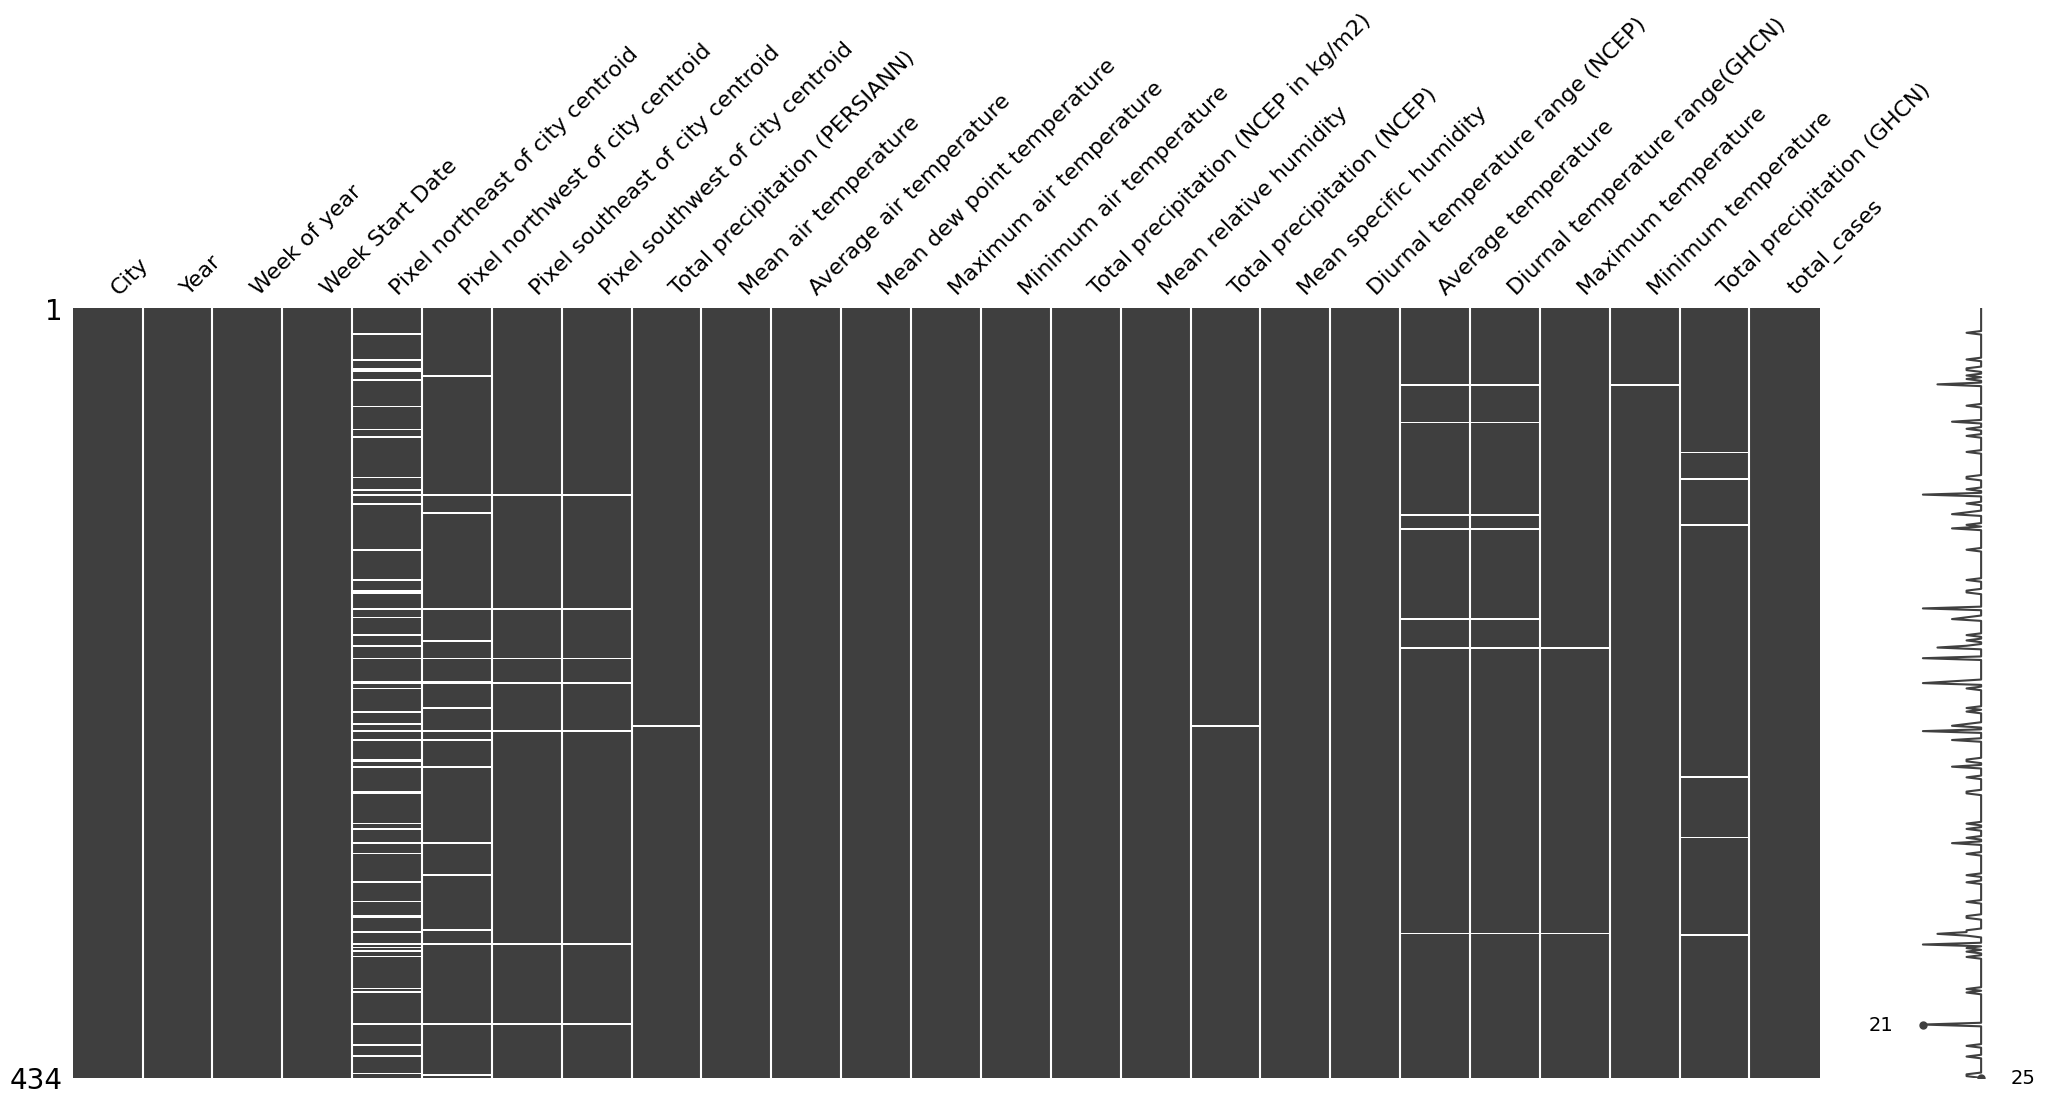

In [154]:
msno.matrix(copia_df.sample(frac=0.3))

In [155]:
#divide el Data frame en 3, df_cardinal_points para imputar con el vecino mas cercano y df_rest imputación multiple 
df_city = copia_df.iloc[:,:4]
df_pixels = copia_df.iloc[:,4:8]
df_variables = copia_df.iloc[:,8:]


In [158]:
#Rellenar valores de los Pixels con los Vecinos mas cercanos

from sklearn.impute import KNNImputer
# Crear el imputador KNN y pasamos el dataframe de los puntos cardinales 
imputer = KNNImputer(n_neighbors=2)  
df_imputed = imputer.fit_transform(df_pixels) # Entrena e imputar los datos
df_pixels_imputed = pd.DataFrame(df_imputed, columns=df_pixels.columns)
df_pixels_imputed = df_pixels_imputed.reset_index(drop=True)
df_pixels_imputed.isnull().sum()


Pixel northeast of city centroid    0
Pixel northwest of city centroid    0
Pixel southeast of city centroid    0
Pixel southwest of city centroid    0
dtype: int64

In [159]:
#Rellena las volumnas con las varibles, con imputación multiple 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear el imputador IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0) 
variables_imputed = imputer.fit_transform(df_variables) # Ajustar e imputar los datos
# Convertir el resultado de nuevo a un DataFrame
df_variables_imputed = pd.DataFrame(variables_imputed, columns=df_variables.columns)

df_variables_imputed.isnull().sum()

Total precipitation (PERSIANN)         0
Mean air temperature                   0
Average air temperature                0
Mean dew point temperature             0
Maximum air temperature                0
Minimum air temperature                0
Total precipitation (NCEP in kg/m2)    0
Mean relative humidity                 0
Total precipitation (NCEP)             0
Mean specific humidity                 0
Diurnal temperature range (NCEP)       0
Average temperature                    0
Diurnal temperature range(GHCN)        0
Maximum temperature                    0
Minimum temperature                    0
Total precipitation (GHCN)             0
total_cases                            0
dtype: int64

City                                   0
Year                                   0
Week of year                           0
Week Start Date                        0
Pixel northeast of city centroid       0
Pixel northwest of city centroid       0
Pixel southeast of city centroid       0
Pixel southwest of city centroid       0
Total precipitation (PERSIANN)         0
Mean air temperature                   0
Average air temperature                0
Mean dew point temperature             0
Maximum air temperature                0
Minimum air temperature                0
Total precipitation (NCEP in kg/m2)    0
Mean relative humidity                 0
Total precipitation (NCEP)             0
Mean specific humidity                 0
Diurnal temperature range (NCEP)       0
Average temperature                    0
Diurnal temperature range(GHCN)        0
Maximum temperature                    0
Minimum temperature                    0
Total precipitation (GHCN)             0
total_cases     

<Axes: >

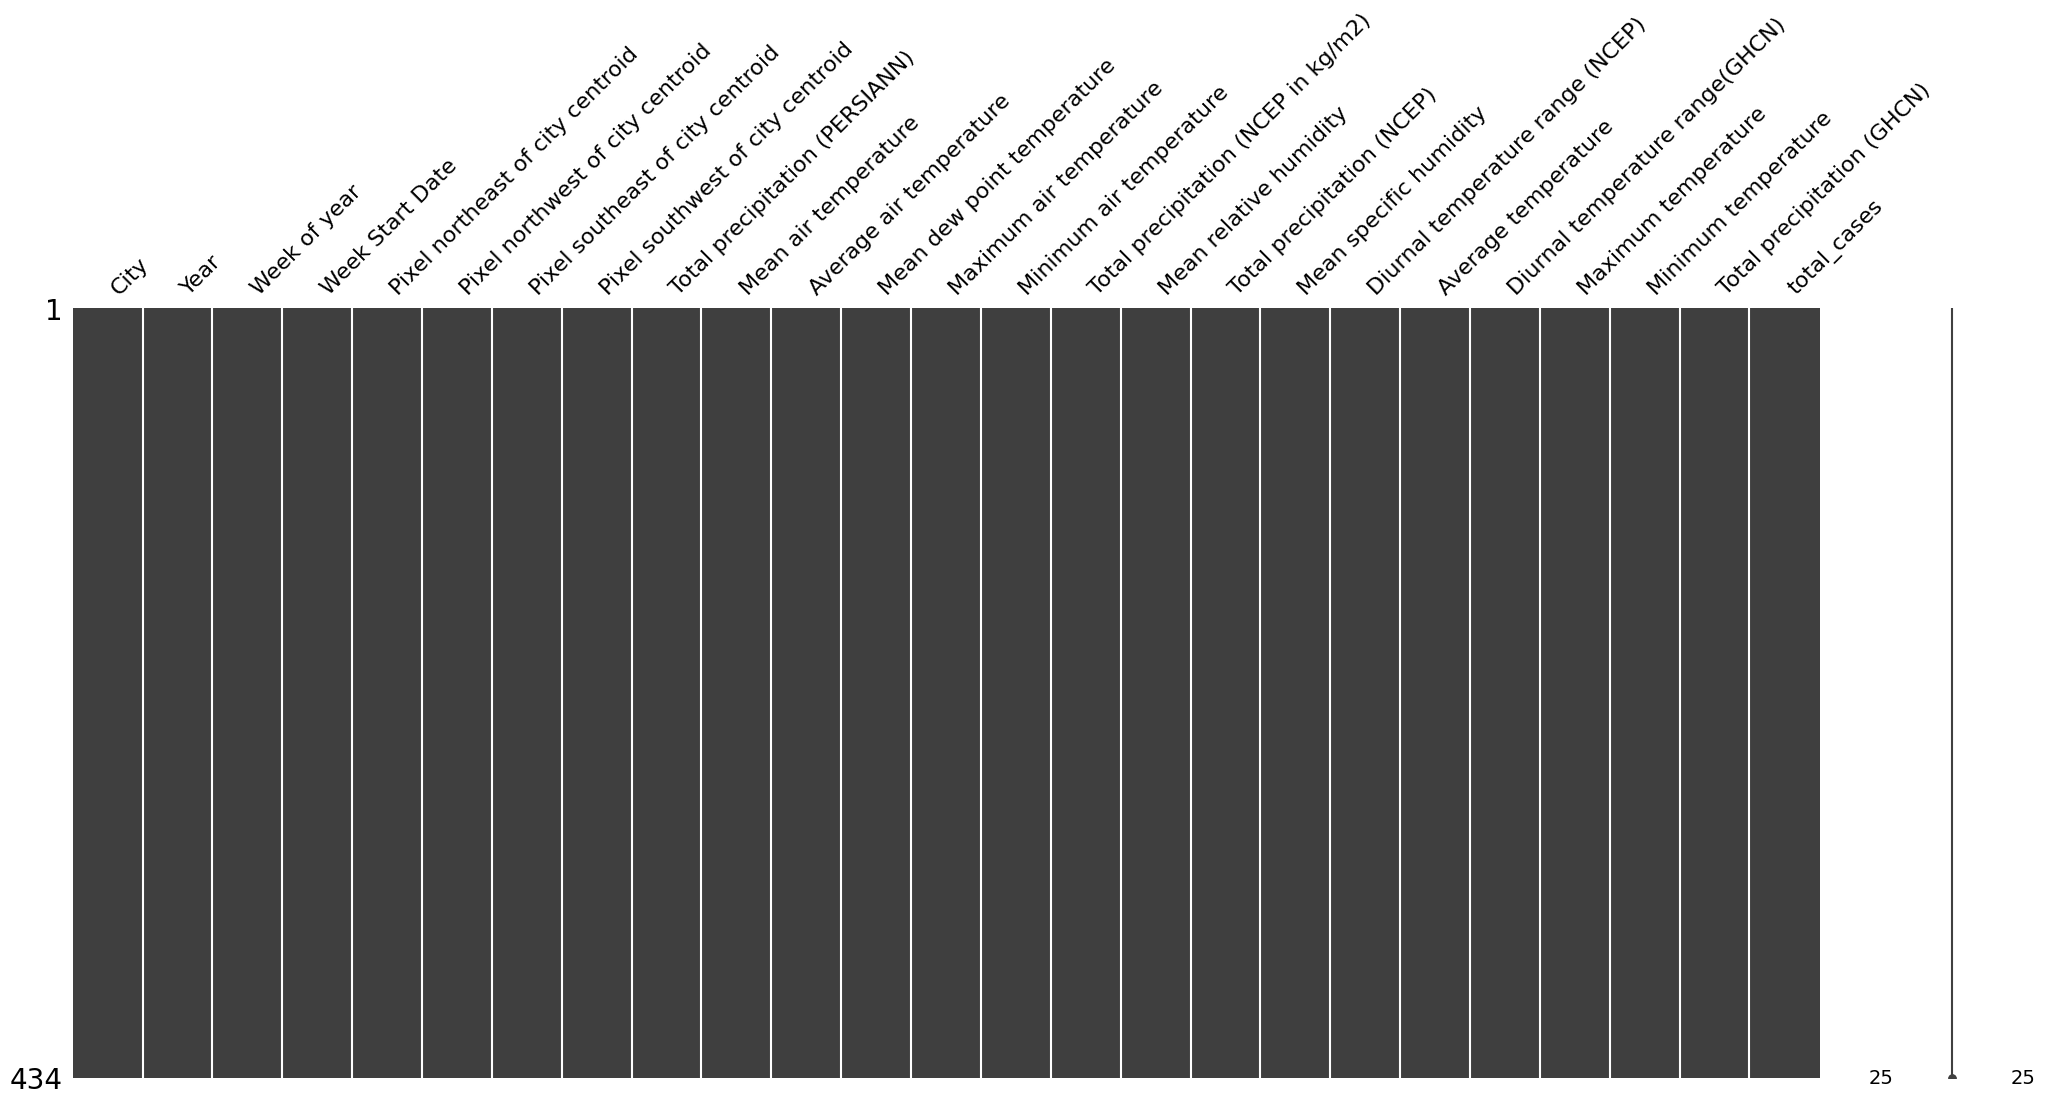

In [160]:
#concatenan los 3 dataframes
df_city = df_city.reset_index(drop=True)
df_pixels_imputed = df_pixels_imputed.reset_index(drop=True)
df_variables_imputed = df_variables_imputed.reset_index(drop=True)

df_cleaned = pd.concat([df_city, df_pixels_imputed, df_variables_imputed], axis=1) #Se concatenan los 3 DataFrames 

print(df_cleaned.isnull().sum())
msno.matrix(df_cleaned.sample(frac=0.3))


In [161]:
df_cleaned[df_cleaned.duplicated()] #No se observan valores duplicados

Empty DataFrame
Columns: [City, Year, Week of year, Week Start Date, Pixel northeast of city centroid, Pixel northwest of city centroid, Pixel southeast of city centroid, Pixel southwest of city centroid, Total precipitation (PERSIANN), Mean air temperature, Average air temperature, Mean dew point temperature, Maximum air temperature, Minimum air temperature, Total precipitation (NCEP in kg/m2), Mean relative humidity, Total precipitation (NCEP), Mean specific humidity, Diurnal temperature range (NCEP), Average temperature, Diurnal temperature range(GHCN), Maximum temperature, Minimum temperature, Total precipitation (GHCN), total_cases]
Index: []

[0 rows x 25 columns]

In [162]:
#profile = ProfileReport(df_cleaned, title="Pandas Profiling Report")
#profile 

In [163]:
df_cleaned.to_csv('dengue_clean.csv', index=False)


## Outliyers

In [164]:
#¿Cuál es la distribución de las temperaturas máximas, mínimas y promedio en el conjunto de datos?
# Histograma para Maximum temperature
histograma1 = alt.Chart(df_cleaned).mark_bar(color='orange').encode(
    alt.X('Maximum temperature:Q', bin=alt.Bin(maxbins=30), title='Maximum temperature'),
    alt.Y('count():Q', title='Cantidad'),
    tooltip=[alt.Tooltip('Maximum temperature:Q', title='Max Temp'), alt.Tooltip('count():Q', title='Cantidad')]
).properties(
    title='Distribución de las temperaturas Max, Prom y Min',
    width=600,
    height=400
)
# Histograma para Average temperature
histograma2 = alt.Chart(df_cleaned).mark_bar(color='lightblue').encode(
    alt.X('Average temperature:Q', bin=alt.Bin(maxbins=30), title='Average temperature'),
    alt.Y('count():Q', title='Cantidad'),
    tooltip=[alt.Tooltip('Average temperature:Q', title='Avg Temp'), alt.Tooltip('count():Q', title='Cantidad')]
).properties(
    title='Distribución de las temperaturas promedio',
    width=600,
    height=400
)
# Histograma para Minimum temperature
histograma3 = alt.Chart(df_cleaned).mark_bar(color='lightcoral').encode(
    alt.X('Minimum temperature:Q', bin=alt.Bin(maxbins=30), title='Minimum temperature'),
    alt.Y('count():Q', title='Cantidad'),
    tooltip=[alt.Tooltip('Minimum temperature:Q', title='Min Temp'), alt.Tooltip('count():Q', title='Cantidad')]
).properties(
    title='Distribución de las temperaturas mínimas',
    width=600,
    height=400
)
# Combinar los histogramas
chart = histograma1 + histograma2 + histograma3
chart


alt.LayerChart(...)

<Axes: title={'center': 'Variabilidad de las precipitaciones registradas por las diferentes fuentes'}>

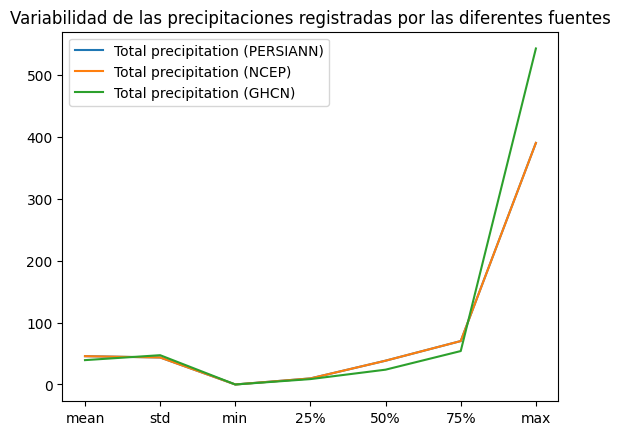

In [165]:
#¿Cuál es la variabilidad de las precipitaciones registradas por las diferentes fuentes (PERSIANN, NCEP, GHCN)?
#df_cleaned['Total precipitation (PERSIANN)'].plot(kind='line')
variabilidad_precipitaciones = df_cleaned[['Total precipitation (PERSIANN)', 'Total precipitation (NCEP)', 'Total precipitation (GHCN)']].describe()
variabilidad_precipitaciones.iloc[1:,:].plot(title='Variabilidad de las precipitaciones registradas por las diferentes fuentes')


In [166]:
#¿Existen diferencias significativas entre las precipitaciones reportadas por PERSIANN, NCEP y GHCN?
# Transformar el DataFrame a formato largo para Altair
df_long = df_cleaned.melt(
    value_vars=[
        'Total precipitation (PERSIANN)', 
        'Total precipitation (NCEP)', 
        'Total precipitation (GHCN)'
    ],
    var_name='Source',
    value_name='Precipitation'
)

# Crea una paleta de colores
colors = alt.Scale(domain=['Total precipitation (PERSIANN)', 'Total precipitation (NCEP)', 'Total precipitation (GHCN)'], range=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Puedes cambiar estos colores

# Crear el gráfico de caja
box_plot = alt.Chart(df_long).mark_boxplot(size=150).encode(
    x=alt.X('Source:N', title='Fuente de Precipitación', sort=None),
    y=alt.Y('Precipitation:Q', title='Precipitación Total'),
    color=alt.Color('Source:N', scale=colors),
    tooltip=['Source:N', 'Precipitation:Q']
).properties(
    title='Diferencias entre las precipitaciones reportadas (PERSIANN, NCEP y GHCN)',
    width=600,
    height=400
).configure_axisX(
    labelAngle=0
)

box_plot

alt.Chart(...)

In [244]:
#¿Cómo varía la temperatura promedio a lo largo del año (según las semanas)?
average_temp = df_cleaned.groupby('Week of year')['Average temperature'].mean().reset_index()
average_temp = pd.DataFrame(average_temp)
average_temp
# Crear el gráfico de línea
line_chart = alt.Chart(average_temp).mark_line().encode(
    x=alt.X('Week of year:O', title='Semana del Año'),
    y=alt.Y('Average temperature:Q', title='Temperatura Promedio', scale=alt.Scale(domain=[25, 29])),
    tooltip=['Week of year:O','Average temperature:Q']
).properties(
    title='Temperatura Promedio durante el Año',
    width=600,
    height=400
)
line_chart


alt.Chart(...)

City
iq    27.501696
sj    27.006528
Name: Average temperature, dtype: float64
Ciudad con mayor temperatura promedio: iq
Ciudad con menor temperatura promedio: sj


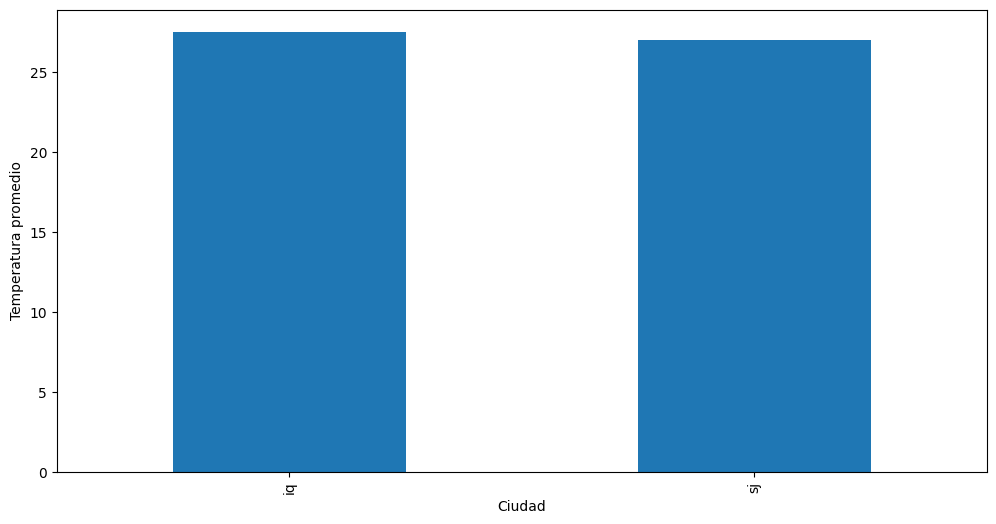

In [169]:
#¿Qué ciudad tiene la mayor y menor temperatura promedio?
temp_city =df_cleaned.groupby('City')['Average temperature'].mean().sort_values(ascending=False)
print(temp_city)
plt.figure(figsize=(12, 6))
temp_city.plot(kind='bar')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura promedio')
print("Ciudad con mayor temperatura promedio:", temp_city.idxmax())
print("Ciudad con menor temperatura promedio:", temp_city.idxmin())


In [170]:
#¿Cuál es la relación entre la temperatura máxima y mínima en cada ciudad?

print(df_cleaned.groupby('City')['Maximum temperature'].idxmax())
print(df_cleaned.groupby('City')['Minimum temperature' ].idxmin())


City
iq    1072
sj     279
Name: Maximum temperature, dtype: int64
City
iq    933
sj    453
Name: Minimum temperature, dtype: int64


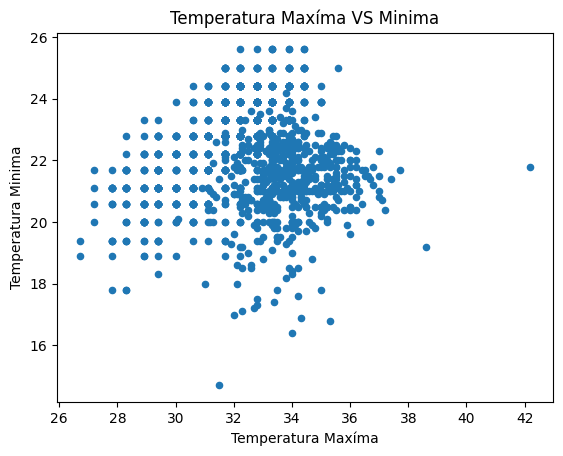

In [171]:
#Relación entre temperatura máxima y mínima
max_min_temp = df[['Maximum temperature', 'Minimum temperature']]
max_min_temp.plot(kind='scatter',
                    x='Maximum temperature',
                    y='Minimum temperature',
                    title= 'Temperatura Maxíma VS Minima',
                    xlabel='Temperatura Maxíma',
                    ylabel='Temperatura Minima'
                    )

plt.show()

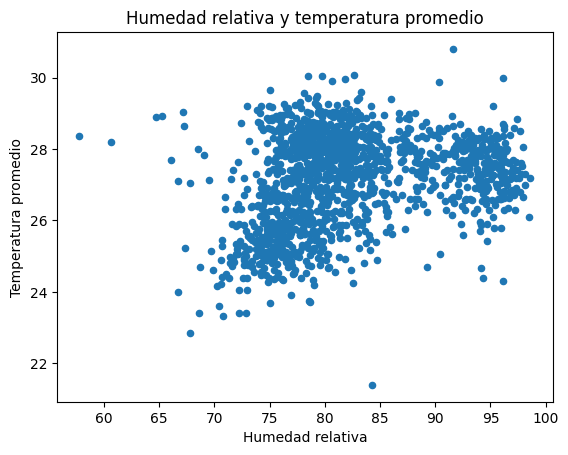

In [172]:
#¿Cómo se correlaciona la humedad relativa con la temperatura promedio?

max_min_temp = df[['Mean relative humidity', 'Average temperature']]
max_min_temp.plot(kind='scatter',
                    x='Mean relative humidity',
                    y='Average temperature',
                    title= 'Humedad relativa y temperatura promedio',
                    xlabel='Humedad relativa',
                    ylabel='Temperatura promedio'
                    )

plt.show()

<Axes: xlabel='Week of year'>

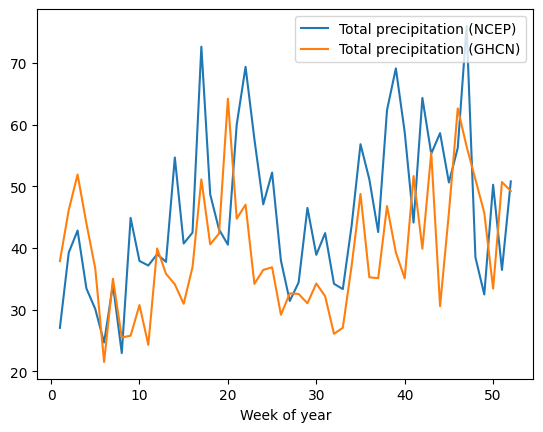

In [173]:
#¿Cuál es la tendencia de las precipitaciones a lo largo de las semanas del año?
tendencia_precip = df_cleaned.groupby('Week of year')[['Total precipitation (NCEP)', 'Total precipitation (GHCN)']].mean()
tendencia_precip.plot()

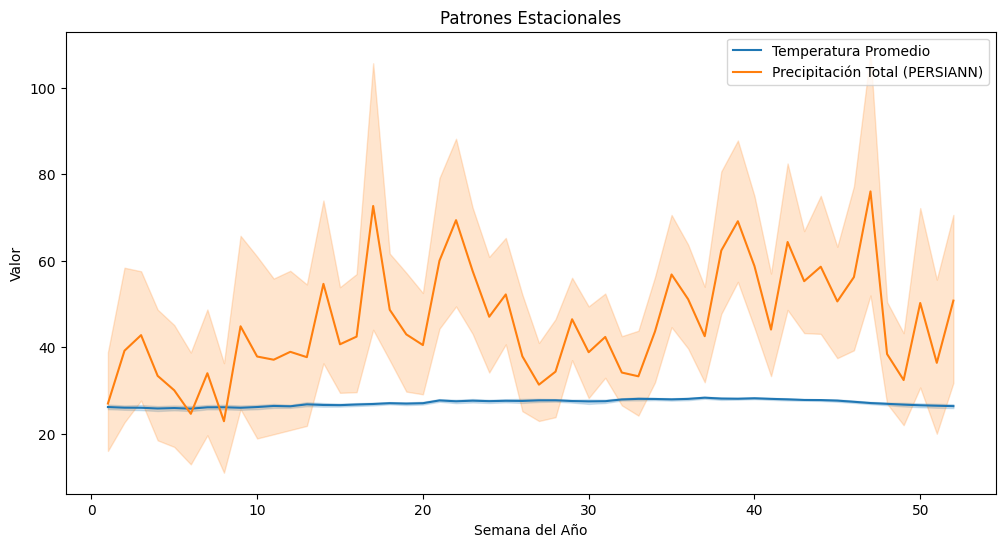

In [174]:
#¿Existen patrones estacionales en la temperatura y la precipitación?
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week of year', y='Average temperature', data=df_cleaned, label='Temperatura Promedio')
sns.lineplot(x='Week of year', y='Total precipitation (PERSIANN)', data=df_cleaned, label='Precipitación Total (PERSIANN)')
#sns.lineplot(x='Week of year', y='Total precipitation (NCEP)', data=df_cleaned, label='Total precipitation (NCEP)')
plt.title('Patrones Estacionales')
plt.xlabel('Semana del Año')
plt.ylabel('Valor')
plt.legend()
plt.show()

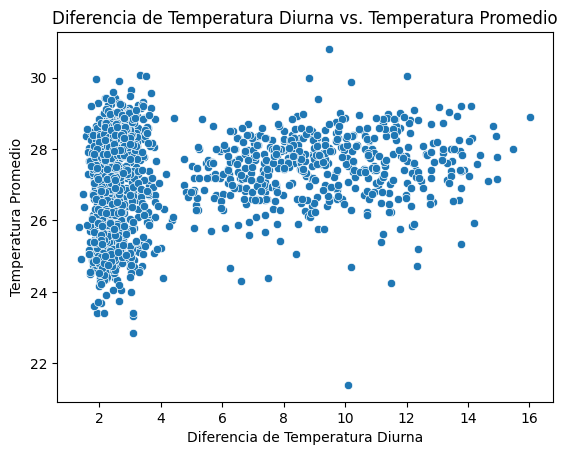

In [175]:
#¿Cómo afecta la diferencia de temperatura diurna a la temperatura promedio?
sns.scatterplot(x='Diurnal temperature range (NCEP)', y='Average temperature', data=df_cleaned)
plt.title('Diferencia de Temperatura Diurna vs. Temperatura Promedio')
plt.xlabel('Diferencia de Temperatura Diurna')
plt.ylabel('Temperatura Promedio')
plt.show()

In [176]:
# Relación entre humedad específica y humedad relativa
source = df_cleaned[['Mean specific humidity', 'Mean relative humidity']]

alt.Chart(source).mark_circle().encode(
    alt.X('Mean specific humidity:Q', title= 'Humedad Específica',scale=alt.Scale(domain=[10, 21])),
    alt.Y('Mean relative humidity:Q', title='Humedad Relativa',scale=alt.Scale(domain=[55, 100]))
).properties(
        height=500,
        width=500,
        title= 'Humedad Específica vs. Humedad Relativa',
)



alt.Chart(...)

In [177]:
#Hay alguna correlación entre las precipitaciones y las temperaturas extremas
source1 = df_cleaned[['Total precipitation (PERSIANN)', 'Maximum temperature', 'Minimum temperature']].corr().round(4)
source1 = source1.stack().reset_index()
source1.columns = ['Col_1','Col_2','correlaciones']
source1

heatmap1 = alt.Chart(source1).mark_rect().encode(
    x='Col_1:O',
    y='Col_2:O', 
    color=alt.Color("correlaciones:Q", scale=alt.Scale(scheme='blues')),
    tooltip=['Col_1', 'Col_2', 'correlaciones']
).properties(
    width=200,
    height=200,
    title='Mapa de Correlación Temperaturas (PERSIANN)'
)

source2 = df_cleaned[['Total precipitation (NCEP)', 'Maximum temperature', 'Minimum temperature']].corr().round(4)
source2 = source2.stack().reset_index()
source2.columns = ['Col_1','Col_2','correlaciones']
source2

heatmap2 = alt.Chart(source2).mark_rect().encode(
    x='Col_1:O',
    y='Col_2:O', 
    color=alt.Color("correlaciones:Q", scale=alt.Scale(scheme='blues')),
    tooltip=['Col_1', 'Col_2', 'correlaciones']
).properties(
    width=200,
    height=200,
    title='Mapa de Correlación Temperaturas (NCEP)'
)

source3 = df_cleaned[['Total precipitation (GHCN)', 'Maximum temperature', 'Minimum temperature']].corr().round(4)
source3 = source3.stack().reset_index()
source3.columns = ['Col_1','Col_2','correlaciones']
source3

heatmap3 = alt.Chart(source3).mark_rect().encode(
    x='Col_1:O',
    y='Col_2:O', 
    color=alt.Color("correlaciones:Q", scale=alt.Scale(scheme='blues')),
    tooltip=['Col_1', 'Col_2', 'correlaciones']
).properties(
    width=200,
    height=200,
    title='Mapa de Correlación Temperaturas (GHCN)'
)

heatmap1 | heatmap2 | heatmap3


alt.HConcatChart(...)

In [245]:
# 14. Diferencia en precipitaciones y temperaturas entre estaciones del año
copy_clean = df_cleaned.copy()
copy_clean['season'] = df_cleaned['Week of year'].apply(lambda x: 'Winter' if x in [49, 50, 51, 52, 1, 2, 3] else 'Spring' if x in [4, 5, 6, 7, 8, 9] else 'Summer' if x in [10, 11, 12, 13, 14, 15] else 'Fall')

Prec_por_estacion1 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Total precipitation (PERSIANN)', title='Precipitación Total (PERSIANN)', axis=alt.Axis(titleAnchor='middle')),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Total precipitation (PERSIANN):Q']
).properties(
    width=390,
    height=200,
    title='Diferencia en precipitaciones por cada estación del año'
)

Prec_por_estacion2 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Total precipitation (GHCN)', title='Precipitación Total (GHCN)'),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Total precipitation (GHCN):Q']
).properties(
    width=390,
    height=200,
)

Prec_por_estacion3 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Total precipitation (NCEP)', title='Precipitación Total (NCEP)'),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Total precipitation (NCEP):Q']
).properties(
    width=390,
    height=200,
)

precipitaciones =  Prec_por_estacion1 & Prec_por_estacion2 & Prec_por_estacion3

In [179]:
temp_por_estacion1 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Maximum temperature', title='Temperatura Maxíma', scale=alt.Scale(domain=[10, 45])),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Maximum temperature:Q']
).properties(
    width=390,
    height=200,
    title='Diferencia en Temperaturas por cada estación del año'
)

temp_por_estacion2 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Average temperature', title='Temperatura Promedio', scale=alt.Scale(domain=[10, 45])),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Average temperature:Q']
).properties(
    width=390,
    height=200,
)

temp_por_estacion3 = alt.Chart(copy_clean).mark_boxplot(size=80).encode(
    x=alt.X('season', title=''),
    y=alt.Y('Minimum temperature', title='Temperatura Minima', scale=alt.Scale(domain=[10, 45])),
    color=alt.Color('season:N', legend=None),
    tooltip=['season:N', 'Minimum temperature:Q']
).properties(
    width=390,
    height=200,
)

temperaturas = temp_por_estacion1 & temp_por_estacion2 & temp_por_estacion3

In [180]:
boxes = alt.hconcat(precipitaciones, temperaturas)
boxes

alt.HConcatChart(...)

In [181]:
#Ciudades con valores extremos en temperatura y precipitación
temp_precip_extremes = df_cleaned.groupby('City').agg({'Total precipitation (NCEP)': ['max', 'min'], 'Total precipitation (PERSIANN)': ['max', 'min'], 'Total precipitation (GHCN)': ['max', 'min']}).round(2)
print("Ciudades con temperaturas y precipitaciones extremas:")
temp_precip_extremes

Ciudades con temperaturas y precipitaciones extremas:


Total precipitation (NCEP)      Total precipitation (PERSIANN)       \
                            max  min                            max  min   
City                                                                       
iq                       210.83  0.0                         210.83  0.0   
sj                       390.60  0.0                         390.60  0.0   

     Total precipitation (GHCN)       
                            max  min  
City                                  
iq                        543.3  0.0  
sj                        305.9  0.0

In [182]:
#Datos para el Grafico de Correlación 
matriz_correlacion = df_cleaned.iloc[:,1:].corr(method='pearson').round(4)
matriz_long = matriz_correlacion.stack().reset_index()
matriz_long.columns = ['columna 1', 'columna 2', 'Correlaciones']
matriz_long.head()

C:\Users\edgarcia\AppData\Local\Temp\ipykernel_17712\1041289768.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_cleaned.iloc[:,1:].corr(method='pearson').round(4)


columna 1                         columna 2  Correlaciones
0      Year                              Year         1.0000
1      Year                      Week of year        -0.0739
2      Year  Pixel northeast of city centroid         0.1990
3      Year  Pixel northwest of city centroid         0.1471
4      Year  Pixel southeast of city centroid         0.2325

In [183]:
#Grafico de Correlación 
heatmap = alt.Chart(matriz_long).mark_rect().encode(
    x='columna 2:O',
    y='columna 1:O', 
    color=alt.Color("Correlaciones:Q", scale=alt.Scale(scheme='lightgreyred')),
    tooltip=['columna 1', 'columna 2', 'Correlaciones']
).properties(
    width=450,
    height=450,
    title='Mapa de Correlación de Variables'
)
heatmap


alt.Chart(...)

In [ ]:
# Se observa que hay un alta correlación entre Mean dew point temperature y Mean specific humidity
grafico_linea = alt.Chart(df_cleaned).mark_point().encode(
    x=alt.X('Mean dew point temperature:Q', title='Temperatura media del punto de rocío', scale=alt.Scale(domain=[288, 300])),
    y=alt.Y('Mean specific humidity:Q',  title='Humedad específica media', scale=alt.Scale(domain=[10, 22])),
    tooltip=[
            alt.Tooltip('Mean dew point temperature:Q', title='Temperatura', format=',.1f'),  # Con comas y un decimal
            alt.Tooltip('Mean specific humidity:Q', title='Humedad', format='.1f')  # Entero
    ]
).properties(
    title='Relación entre Temperatura y Humedad'
)
grafico_linea

In [185]:
#Gráfico de regresión Mean dew point temperature y Mean specific humidity
regression_chart = alt.Chart(df_cleaned).mark_point().encode(
    x=alt.X('Mean dew point temperature:Q',  title='Temperatura media del punto de rocío', scale=alt.Scale(domain=[288, 300])),
    y=alt.Y('Mean specific humidity:Q', title='Humedad específica media', scale=alt.Scale(domain=[10, 22])),
    tooltip=['Mean dew point temperature:O', 'Mean specific humidity:Q']
).properties(
    title='Gráfico de Regresión'
).transform_regression(
    'Mean dew point temperature', 'Mean specific humidity'
).mark_line()

In [186]:
grafico_linea | regression_chart

alt.HConcatChart(...)

In [187]:
def plot_distribution(df, column_name):
    # Crear un DataFrame para la columna seleccionada
    df_col = df[[column_name]]
    
    # Histograma
    hist = alt.Chart(df_col).mark_bar().encode(
        alt.X(f'{column_name}:Q', bin=True, title='Valor'),
        alt.Y('count():Q', title='Frecuencia'),
        #color=alt.Color(f'{column_name}:Q')
        
    ).properties(
        title=f'Histograma de {column_name}',
        width=150,
        height=150,
    )
    
    # Puntos para la curva de densidad
    x = np.linspace(df_col[column_name].min(), df_col[column_name].max(), 100)
    mean = df_col[column_name].mean()
    std_dev = df_col[column_name].std()
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    df_pdf = pd.DataFrame({'x': x, 'pdf': y})
    
    # Línea de densidad
    density = alt.Chart(df_pdf).mark_line(color='red').encode(
        alt.X('x:Q', title='Valor'),
        alt.Y('pdf:Q', title='Densidad'),
        tooltip=['x:Q', 'pdf:Q']
    )
    
    # Combinar el histograma y la línea de densidad
    return hist + density

def chunk_list(lst, chunk_size):
    """Divide una lista en sublistas de tamaño chunk_size."""
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]


In [188]:
df_chart = df_cleaned.iloc[:,4:]

In [189]:
# Crear una lista para almacenar los gráficos
charts = []

# Iterar sobre las columnas y generar los gráficos
for column in df_chart.columns:
    chart = plot_distribution(df_chart, column)
    charts.append(chart)

# Dividir los gráficos en grupos de 5
groups = chunk_list(charts, 4)

# Combinar cada grupo horizontalmente
horizontal_charts = [alt.hconcat(*group) for group in groups]

# Combinar todos los grupos verticalmente
combined_chart = alt.vconcat(*horizontal_charts).resolve_scale(
    y='shared'
)
combined_chart

alt.VConcatChart(...)

- índice de vegetación de diferencia normalizada (NDVI) Es posible identificar la salud de la vegetación
- alrededor de la ciudad en las 4 dir. cardinales, o entender cómo varía la vegetación en el entorno urbano.
- 
- 1 - vegetación densa y saludable, 
- 0 - áreas vegetación escasa o sin vegetación, 
- Negativos - cuerpos de agua o áreas no vegetadas
- 
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

In [190]:
df_sj = df_cleaned[df_cleaned['City'] == 'sj']
df_iq = df_cleaned[df_cleaned['City'] != 'sj']

#Promedio de NDVI por año en las cuatro regiones 
avg_ndvi_sj =df_sj.groupby('Year')[['Pixel northwest of city centroid', 'Pixel northeast of city centroid',  'Pixel southwest of city centroid', 'Pixel southeast of city centroid']].mean()
avg_ndvi_sj = avg_ndvi_sj.reset_index()

avg_ndvi_iq =df_iq.groupby('Year')[['Pixel northwest of city centroid', 'Pixel northeast of city centroid',  'Pixel southwest of city centroid', 'Pixel southeast of city centroid']].mean()
avg_ndvi_iq = avg_ndvi_iq.reset_index()

#Se transforma la tabla para garficar los datos 
df_melted_sj = pd.melt(avg_ndvi_sj, id_vars='Year' ,var_name='NDVI')
df_melted_iq = pd.melt(avg_ndvi_iq, id_vars='Year' ,var_name='NDVI')

#Grafico

ndvi_sj_chart = alt.Chart(df_melted_sj).mark_area().encode(
    x=alt.X("Year:O", title=''),
    y=alt.Y("value:Q", title=''),
    color="NDVI:N",
    row=alt.Row("NDVI:N").sort(['Pixel northwest of city centroid', 'Pixel northeast of city centroid',  'Pixel southwest of city centroid', 'Pixel southeast of city centroid'],
    axis=alt.Axis(labels=False)
    ),
    tooltip=["Year:O", "value:Q", "NDVI:N"]
).properties(height=100, 
            width=500,
            title='Distribución promedio de NDVI por año en San Juan'
)

ndvi_sj_chart 

ndvi_iq_chart = alt.Chart(df_melted_iq).mark_area().encode(
    x=alt.X("Year:O", title=''),
    y=alt.Y("value:Q", title=''),
    color="NDVI:N",
    row=alt.Row("NDVI:N").sort(['Pixel northwest of city centroid', 
                                'Pixel northeast of city centroid',  
                                'Pixel southwest of city centroid', 
                                'Pixel southeast of city centroid'], axis=alt.Axis(labels=False)
    ), 
    tooltip=["Year:O", "value:Q", "NDVI:N"]
).properties(height=100, 
            width=500,
            title='Distribución promedio de NDVI por año en Iquitos'
)

ndvi_iq_chart

ndvi_por_cd = alt.hconcat(ndvi_sj_chart, ndvi_iq_chart)
ndvi_por_cd


alt.HConcatChart(...)

**Temperatura del aire en las ciudades**

In [ ]:
df_air_temp_sj =df_sj[['Week Start Date', 'Maximum air temperature', 'Minimum air temperature', 'Mean air temperature']]
df_air_temp_sj['Maximum air temperature'] = df_air_temp_sj['Maximum air temperature'] - 273.15
df_air_temp_sj['Minimum air temperature'] = df_air_temp_sj['Minimum air temperature'] - 273.15
df_air_temp_sj['Mean air temperature'] = df_air_temp_sj['Mean air temperature'] - 273.15


In [ ]:
df_air_temp_iq =df_iq[['Week Start Date', 'Maximum air temperature', 'Minimum air temperature', 'Mean air temperature']]
df_air_temp_iq['Maximum air temperature'] = df_air_temp_iq['Maximum air temperature'] - 273.15
df_air_temp_iq['Minimum air temperature'] = df_air_temp_iq['Minimum air temperature'] - 273.15
df_air_temp_iq['Mean air temperature'] = df_air_temp_iq['Mean air temperature'] - 273.15

In [193]:
#Grafico
bar = alt.Chart(df_air_temp_sj).mark_bar(cornerRadius=10, height=10).encode(
    x=alt.X('min(Minimum air temperature):Q').scale(domain=[16, 34]).title('Temperature (°C)'),
    x2='max(Maximum air temperature):Q',
    color=alt.Color('Mean air temperature:Q', scale=alt.Scale(domain=[20, 30], range=['#ffff00', '#ffeb00', '#ffd700', '#ffb600', '#ff9e00', '#ff8700', '#ff6e00', '#ff5700', '#ff3f00', '#ff0000'])).title(None),
    y=alt.Y('month(Week Start Date):O').title(None),
    tooltip=[
        alt.Tooltip('month(Week Start Date):O', title='Mes'),  # Añadir título a la columna de tooltip
        alt.Tooltip('min(Minimum air temperature):Q', title='Temp Min ', format='.1f'),
        alt.Tooltip('max(Maximum air temperature):Q', title='Temp Max', format='.1f') 
    ]
)

text_min = alt.Chart(df_air_temp_sj).mark_text(align='right', dx=-5).encode(
    x='min(Minimum air temperature):Q',
    y=alt.Y('month(Week Start Date):O'),
    text='min(Minimum air temperature):Q'
)

text_max = alt.Chart(df_air_temp_sj).mark_text(align='left', dx=5).encode(
    x='max(Maximum air temperature):Q',
    y=alt.Y('month(Week Start Date):O'),
    text='max(Maximum air temperature):Q'
)

df_air_temp_sj_chart = (bar + text_min + text_max).properties(
    title=alt.Title(text='Variación de Temperatura del Aire por Mes', subtitle='San Juan, Puerto Rico de 1990 al 2008')
)




In [194]:
#Iquitos, Peru
bar = alt.Chart(df_air_temp_iq).mark_bar(cornerRadius=10, height=10).encode(
    x=alt.X('min(Minimum air temperature):Q').scale(domain=[15, 45]).title('Temperature (°C)'),
    x2='max(Maximum air temperature):Q',
    color=alt.Color('Mean air temperature:Q', scale=alt.Scale(domain=[15, 30], range=['#ffff00', '#ffeb00', '#ffd700', '#ffb600', '#ff9e00', '#ff8700', '#ff6e00', '#ff5700', '#ff3f00', '#ff0000'])).title(None),
    y=alt.Y('month(Week Start Date):O').title(None),
    tooltip=[
        alt.Tooltip('month(Week Start Date):O', title='Mes'),  # Añadir título a la columna de tooltip
        alt.Tooltip('min(Minimum air temperature):Q', title='Temp Min ', format='.1f'),
        alt.Tooltip('max(Maximum air temperature):Q', title='Temp Max', format='.1f') 
    ]
)

text_min = alt.Chart(df_air_temp_iq).mark_text(align='right', dx=-3).encode(
    x='min(Minimum air temperature):Q',
    y=alt.Y('month(Week Start Date):O'),
    text='min(Minimum air temperature):Q'
)

text_max = alt.Chart(df_air_temp_iq).mark_text(align='left', dx= 3).encode(
    x='max(Maximum air temperature):Q',
    y=alt.Y('month(Week Start Date):O'),
    text='max(Maximum air temperature):Q'
)

df_air_temp_iq_chart = (bar + text_min + text_max).properties(
    title=alt.Title(text='Variación de Temperatura del Aire por Mes', subtitle='Iquitos, Perú de 2000 al 2010')
)

df_air_temp_sj_chart | df_air_temp_iq_chart

alt.HConcatChart(...)

In [195]:
columnas = ['City', 'Year', 'Week of year', 'Week Start Date', 'Mean relative humidity']
relative_humedity = df_cleaned[columnas]

humed_rel_sj = relative_humedity[relative_humedity['City'] == 'sj']
humed_rel_iq = relative_humedity[relative_humedity['City'] == 'iq']

In [246]:
#Clasifica por cuatrimestres
def get_quadrimester(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [ 7, 8, 9]:
        return 3
    elif month in [10, 11, 12]:
        return 4
    else:
        return None  # Por si acaso hay valores inesperados

In [ ]:
# Aplicar la función para obtener trimestres
humed_rel_sj['Trimestre'] = humed_rel_sj['Week Start Date'].dt.month.apply(get_quadrimester)
humed_rel_iq['Trimestre'] = humed_rel_iq['Week Start Date'].dt.month.apply(get_quadrimester)

In [ ]:
humed_por_q_sj  = humed_rel_sj.groupby(['Year', 'Trimestre'])['Mean relative humidity'].mean().reset_index()
humed_por_q_iq =  humed_rel_iq.groupby(['Year', 'Trimestre'])['Mean relative humidity'].mean().reset_index()
humed_por_q_iq

In [199]:
#Humedad de las ciudades por trimestre 
# Size of the dropbins
size = 20
# Count of distinct x features
xFeaturesCount = 4
# Count of distinct y features
yFeaturesCount = 25
drop_shape = "M0,0 C-0.5,1 -1,1.5 -1,2 C-1,2.5 -0.5,3 0,3 C0.5,3 1,2.5 1,2 C1,1.5 0.5,1 0,0 Z"
color_scale = alt.Scale(domain=[73.35, 82.75], range=['#add8e6', '#b0d0e1', '#93b7d4', '#78a1c7', '#6492c1', '#4a7bb4', '#3464a7', '#2a4f8f', '#1f3d6b', '#00008b'])

alt.Chart(humed_por_q_sj).mark_point(size=size**2, shape=drop_shape).encode(
    alt.X('xFeaturePos:Q')
        .title('Trimestre')
        .axis(labelPadding=20, grid=False, tickOpacity=0, domainOpacity=0),
    alt.Y('Year:N', title='Year')
        .title('Year')
        .axis(grid=True, labelPadding=0, tickOpacity=0, domainOpacity=0),
    stroke=alt.value('black'),
    strokeWidth=alt.value(2),
    fill=alt.Fill('mean(Mean relative humidity):Q').scale(color_scale).legend(title='Humedad Relativa', orient='right'),
    tooltip=['Year:N', 'Trimestre:N', 'Mean relative humidity:Q']
).transform_calculate(
    # Calcular la posición X en base al cuatrimestre (3 cuatrimestres por fila)
    xFeaturePos='datum.Trimestre'
).properties(
    # Exact scaling factors to make the hexbins fit
    width=size * xFeaturesCount * 1.2,
    height=size * yFeaturesCount * 1.320508076,  
    title=alt.Title(text='Humedad Relativa Media por Trimestre', subtitle='San Juan de 1990 al 2008')
).configure_view(
    strokeWidth=0
)



alt.Chart(...)

In [200]:
#Humedad iq
color_scale = alt.Scale(domain=[75, 95.30], range=['#add8e6', '#9ac3d0', '#6fa8b3', '#478da5', '#1d7598', '#005f8e', '#004d7a', '#003e6b', '#002f5c', '#00008b'])

alt.Chart(humed_por_q_iq).mark_point(size=size**2, shape=drop_shape).encode(
    alt.X('xFeaturePos:Q')
        .title('Trimestre')
        .axis(labelPadding=20, grid=False, tickOpacity=0, domainOpacity=0),
    alt.Y('Year:N', title='Year')
        .title('Year')
        .axis(grid=True, labelPadding=0, tickOpacity=0, domainOpacity=0),
    stroke=alt.value('black'),
    strokeWidth=alt.value(2),
    fill=alt.Fill('mean(Mean relative humidity):Q').scale(color_scale).legend(title='Humedad Relativa', orient='right'),
    tooltip=['Year:N', 'Trimestre:N', 'Mean relative humidity:Q']
).transform_calculate(
    # Calcular la posición X en base al cuatrimestre (3 cuatrimestres por fila)
    xFeaturePos='datum.Trimestre'
).properties(
    # Exact scaling factors to make the hexbins fit
    width=size * xFeaturesCount * 1.2,
    height=size * yFeaturesCount ,  
    title=alt.Title(text='Humedad Relativa Media por Trimestre', subtitle='Iquitos, Perú de 2000 al 2010')
).configure_view(
    strokeWidth=0
)




alt.Chart(...)

In [201]:
#Casos maximos por año
casos_sj = df_cleaned[df_cleaned['City'] == 'sj']
casos_sj = casos_sj.groupby(['Year'])['total_cases'].sum().reset_index().sort_values(by='total_cases', ascending=False)
print('Años con mas casos en San Juan:\n',casos_sj.head())
casos_iq = df_cleaned[df_cleaned['City'] == 'iq']
casos_iq = casos_iq.groupby(['Year'])['total_cases'].sum().reset_index().sort_values(by='total_cases', ascending=False)
print('\nAños con mas casos en Iquitos:\n', casos_iq.head())

Años con mas casos en San Juan:
     Year  total_cases
4   1994       6533.0
8   1998       4531.0
1   1991       2801.0
2   1992       2290.0
17  2007       1969.0

Años con mas casos en Iquitos:
    Year  total_cases
8  2008        801.0
2  2002        704.0
4  2004        634.0
6  2006        436.0
7  2007        365.0


In [202]:
#Se observa que los años con mas casos son 1994 y 2008 para las cuidades de San J e Iquitos respectivamente. 
casos_sj_1994 = df_cleaned[(df_cleaned['Year'] == 1994) & (df_cleaned['City'] == 'sj')]
casos_iq_2008 = df_cleaned[(df_cleaned['Year'] == 2008) & (df_cleaned['City'] == 'iq')]

In [203]:
#Casos San Juan, 1994 
color_scale = alt.Scale(domain=[13, 461.0], range=['#FFFF00', '#FFEB00', '#FFD700', '#FFB600', '#FF9E00', '#FF8700', '#FF6E00', '#FF5700', '#FF3F00', '#FF0000'])

alt.Chart(casos_sj_1994).mark_rect().encode(
    alt.X("date(Week Start Date):O").title("Día").axis(format="%e", labelAngle=0),
    alt.Y("month(Week Start Date):O").title("Mes"),
    alt.Color("total_cases").title(None).scale(color_scale).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("monthdate(Week Start Date)", title="Date"),
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
).configure_view(
    step=25,
    strokeWidth=0
).configure_axis(
    domain=False
).properties(title=alt.Title(text='Numero de Casos por Semana', subtitle='San Juan, Puerto Rico. 1994'))

alt.Chart(...)

In [204]:
#Casos Iquitos 2008
color_scale = alt.Scale(domain=[0, 63], range=['#FFFF00', '#FFEB00', '#FFD700', '#FFB600', '#FF9E00', '#FF8700', '#FF6E00', '#FF5700', '#FF3F00', '#FF0000'])

alt.Chart(casos_iq_2008).mark_rect().encode(
    alt.X("date(Week Start Date):O").title("Día").axis(format="%e", labelAngle=0),
    alt.Y("month(Week Start Date):O").title("Mes"),
    alt.Color("total_cases").title(None).scale(color_scale).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("monthdate(Week Start Date)", title="Date"),
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
).configure_view(
    step=25,
    strokeWidth=0
).configure_axis(
    domain=False
).properties(title=alt.Title(text='Numero de Casos por Semana', subtitle='Iquitos, Perú. 2008'))

alt.Chart(...)

In [205]:
# Casos máximos por año en las dos ciudades
casos_year_and_month = df_cleaned[['City', 'Year', 'total_cases']].copy()
casos_year_and_month['Month'] = df_cleaned['Week Start Date'].dt.month

casos_sj_year_m = casos_year_and_month[df_cleaned['City'] == 'sj']
casos_sj_year_m = casos_sj_year_m.groupby(['Year','Month'])['total_cases'].sum().reset_index().sort_values(by=['Year', 'Month'], ascending=True)

casos_p_anio = casos_sj_year_m.groupby('Year')['total_cases'].sum().reset_index().sort_values(by='Year', ascending=True)

# Primer gráfico
colors_green = ['#E0FFD4', '#B3F8A2', '#8CEB7D', '#66DE58', '#40D13A', '#2BB628', '#1E9D1B', '#138F14', '#0D7A0E', '#006600']
color_scale_m = alt.Scale(domain=[0, 2300], range=colors_green)

casos_sj_year_m_chart = alt.Chart(casos_sj_year_m).mark_rect().encode(
    alt.X("Year:O").title("").axis(labelAngle=90, labelPadding=20),
    alt.Y("Month:O").title("Mes"),
    alt.Color("total_cases").title(None).scale(color_scale_m).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("Month", title="Date"),
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
).properties(title=alt.Title(text='Número de Casos en cada año y mes', subtitle='San Juan, Puerto Rico'))

# Segundo gráfico
colors_green = ['#E0FFD4', '#B3F8A2', '#8CEB7D', '#66DE58', '#40D13A', '#2BB628', '#1E9D1B', '#138F14', '#0D7A0E', '#006600']

color_scale_a = alt.Scale(domain=[0, 2300], range=colors_green)

casos_sj_year_chart = alt.Chart(casos_p_anio).mark_rect().encode(
    alt.X("Year:O").title("").axis(labelExpr="null", domain=False, ticks=False),
    alt.Y("total_cases:Q").title("Casos por Año").scale(reverse=True).axis(labelExpr="null", domain=False, ticks=False, grid=False),
    alt.Color("total_cases").title(None).scale(color_scale_a).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
)

# Concatenar los gráficos verticalmente y aplicar configuración
combined_chart = alt.vconcat(
    casos_sj_year_m_chart,
    casos_sj_year_chart
).configure_view(
    step=20,
    strokeWidth=0
).configure_axis(
    domain=False
)

# Mostrar el gráfico combinado
combined_chart



alt.VConcatChart(...)

In [206]:
casos_iq_year_m = casos_year_and_month[df_cleaned['City'] == 'iq']
casos_iq_year_m = casos_iq_year_m.groupby(['Year','Month'])['total_cases'].sum().reset_index().sort_values(by=['Year', 'Month'], ascending=True)

casos_p_anio_iq = casos_iq_year_m.groupby('Year')['total_cases'].sum().reset_index().sort_values(by='Year', ascending=True)

# Primer gráfico
colors_green = ['#E0FFD4', '#B3F8A2', '#8CEB7D', '#66DE58', '#40D13A', '#2BB628', '#1E9D1B', '#138F14', '#0D7A0E', '#006600']
color_scale_a = alt.Scale(domain=[0, 191], range=colors_green)

casos_iq_year_m_chart = alt.Chart(casos_iq_year_m).mark_rect().encode(
    alt.X("Year:O").title("").axis(labelAngle=90, labelPadding=20),
    alt.Y("Month:O").title("Mes"),
    alt.Color("total_cases").title(None).scale(color_scale_m).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("Month", title="Date"),
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
).properties(title=alt.Title(text='Número de Casos en cada año y mes', subtitle='San Juan, Puerto Rico'))

# Segundo gráfico
casos_iq_year_chart = alt.Chart(casos_p_anio_iq).mark_rect(fill='#138F14').encode(
    alt.X("Year:O").title("").axis(labelExpr="null", domain=False, ticks=False),
    alt.Y("total_cases:Q").title("Casos por Año").scale(reverse=True).axis(labelExpr="null", domain=False, ticks=False, grid=False),
    alt.Color("total_cases").title(None).scale(color_scale_a).legend(title='Casos'),
    tooltip=[
        alt.Tooltip("total_cases", title="Total de Casos"),
    ],
)

# Concatenar los gráficos verticalmente y aplicar configuración
combined_chart2 = alt.vconcat(
    casos_iq_year_m_chart,
    casos_iq_year_chart
).configure_view(
    step=20,
    strokeWidth=0
).configure_axis(
    domain=False
)

# Mostrar el gráfico combinado
combined_chart2

alt.VConcatChart(...)

## Pipeline de transformación

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split


In [219]:
#Preprocesamiento Divide DataFrame en X, Y 
X = df_cleaned.iloc[:, 0:24]
y = df_cleaned.iloc[:, 24]

In [220]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
#Train 80% 
#Validation 20% 

In [221]:
# one_hot_encoding de la clase ColumnTransformer

one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "City"
        ]
    )
])

In [222]:
binarizer = ColumnTransformer([
    (
        'binarizer',
        Binarizer(),
        [
            'Week of year'
        ]
    )
])

#Se pasa la dependencia binarizer a traves de el pipeline
one_hot_binarized = Pipeline([
    ("binarizer", binarizer),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

In [223]:
#Transformador escalador de columnas 
scaler = ColumnTransformer([
    ("scaler", RobustScaler(), 
    [
        "Total precipitation (PERSIANN)",
        'Mean air temperature',
        'Average air temperature',
        'Mean dew point temperature',
        'Maximum air temperature',
        'Minimum air temperature',
        'Total precipitation (NCEP in kg/m2)',
        'Total precipitation (NCEP)',
        'Total precipitation (GHCN)',
        ])
])

In [224]:
#Solamente permite pasar las columnas sin nunguna tranformación 
passthrough = ColumnTransformer([
    (
        "passthrough",
        "passthrough",
        [
            "Year",
            'Week of year',
            'Pixel northeast of city centroid',
            'Pixel northwest of city centroid',
            'Pixel southeast of city centroid',
            'Pixel southwest of city centroid',
            "Mean relative humidity",
            "Mean specific humidity",
            'Diurnal temperature range (NCEP)',
            'Average temperature',
            'Diurnal temperature range(GHCN)',
            'Maximum temperature',
            'Minimum temperature',
            
            
        ]
    )
])

In [225]:
#Une todas las tranormaciones de caracteristicas creadas anteriormente
union_de_features = FeatureUnion(
                [
                    ("categorical", one_hot_encoding),
                    #("categorical_binarized", one_hot_binarized),
                    ("scaled", scaler),
                    ("pass", passthrough),
                ]
            )

In [226]:
#se le pasa la union a un pipeline
feature_engineering_pipeline = Pipeline(
    [
        (
            "features",
            union_de_features,
        )
    ]
)

In [227]:
feature_engineering_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['City'])])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['Total '
                                                                                   'precipitation '
                                                                                   '(PERSIANN)',
                                                                                   'Mean '
                                                                                   'air '
                                                                                   'temperature',
                                                                                   'Average '
                                                                                   'air '
                                                                                   'temperature...
                                                                                   'northeast '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'northwest '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'southeast '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'southwest '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Mean '
                                                                                   'relative '
                                                                                   'humidity',
                                                                                   'Mean '
                                                                                   'specific '
                                                                                   'humidity',
                                                  

In [228]:
#Entrenando tranformador 
feature_engineering_pipeline.fit(X_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['City'])])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['Total '
                                                                                   'precipitation '
                                                                                   '(PERSIANN)',
                                                                                   'Mean '
                                                                                   'air '
                                                                                   'temperature',
                                                                                   'Average '
                                                                                   'air '
                                                                                   'temperature...
                                                                                   'northeast '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'northwest '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'southeast '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Pixel '
                                                                                   'southwest '
                                                                                   'of '
                                                                                   'city '
                                                                                   'centroid',
                                                                                   'Mean '
                                                                                   'relative '
                                                                                   'humidity',
                                                                                   'Mean '
                                                                                   'specific '
                                                                                   'humidity',
                                                  

In [229]:
#Se tranforman todas las columnas con el pipe
transformed_x = feature_engineering_pipeline.transform(X_train) 

In [230]:
#Se pasa el set Validación para transformalos.
feature_engineering_pipeline.transform(X_validation)

array([[ 0.        ,  1.        ,  0.55217482, ...,  6.9       ,
        31.1       , 22.8       ],
       [ 0.        ,  1.        , -0.17739854, ...,  5.98571429,
        31.1       , 23.3       ],
       [ 0.        ,  1.        , -0.64058273, ...,  6.87142857,
        29.4       , 20.6       ],
       ...,
       [ 0.        ,  1.        , -0.30493236, ...,  7.47142857,
        32.8       , 22.8       ],
       [ 0.        ,  1.        ,  4.14693028, ...,  5.55714286,
        33.3       , 22.2       ],
       [ 1.        ,  0.        ,  1.3773153 , ..., 12.        ,
        36.        , 22.        ]])

## Entrenamiento del Modelo

In [231]:
#Se crea una copia nueva del pipeline
from sklearn.base import clone
feature_transformer = clone(feature_engineering_pipeline) # Se crea un clon del pipeline, para limpiar posibles errores

#Tranformado los set de entrenamiento y prueba con el pipeline 
features_train_x = feature_transformer.fit_transform(X_train) #Se entrenan y despues se transforma las columnas 
features_validate_x = feature_transformer.transform(X_validation) #Se transforma el set de validación

In [232]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42) # Se crea el modelo 

model.fit(features_train_x, y_train) # Se entrena el modelo

GradientBoostingRegressor(n_estimators=1000, random_state=42)

## Validación del Modelo

In [233]:
y_pred = model.predict(features_validate_x)  #Predicen los valores con el set de validación


In [234]:
# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 686.33
R^2 Score: 0.71


In [235]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de las características
print("Feature ranking:")
for f in range(features_validate_x.shape[1]):
    print(f"{f + 1}. Feature: {X.columns[indices[f]]}: {importances[indices[f]]:.4f}")


Feature ranking:
1. Feature: Mean dew point temperature: 0.2819
2. Feature: Maximum air temperature: 0.2299
3. Feature: Minimum air temperature: 0.1005
4. Feature: Total precipitation (NCEP): 0.0721
5. Feature: Week Start Date: 0.0585
6. Feature: Diurnal temperature range(GHCN): 0.0362
7. Feature: Total precipitation (PERSIANN): 0.0321
8. Feature: Pixel southwest of city centroid: 0.0273
9. Feature: Total precipitation (NCEP in kg/m2): 0.0257
10. Feature: Diurnal temperature range (NCEP): 0.0204
11. Feature: Pixel northwest of city centroid: 0.0186
12. Feature: Mean relative humidity: 0.0146
13. Feature: Average air temperature: 0.0138
14. Feature: Minimum temperature: 0.0136
15. Feature: Pixel northeast of city centroid: 0.0116
16. Feature: Average temperature: 0.0081
17. Feature: Total precipitation (GHCN): 0.0078
18. Feature: Maximum temperature: 0.0072
19. Feature: Mean specific humidity: 0.0068
20. Feature: Pixel southeast of city centroid: 0.0055
21. Feature: Week of year: 0.0042

## Construcción del pipeline final

In [236]:
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)), #Se crea un nuevo pipeline de tranformación de datos a partir del creado antes
    ("model", GradientBoostingRegressor(n_estimators=1000)) #se agrega el nuevo modelo. 
])

In [237]:
final_inference_pipeline

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('features',
                                  FeatureUnion(transformer_list=[('categorical',
                                                                  ColumnTransformer(transformers=[('one_hot_encode',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['City'])])),
                                                                 ('scaled',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['Total '
                                                                                                    'precipitation '
                                                                                                    '(PERSIANN)',
                                                                                                    'Mean '
                                                                                                    'air '
                                                                                                    '...
                                                                                                    'centroid',
                                                                                                    'Pixel '
                                                                                                    'southeast '
                                                                                                    'of '
                                                                                                    'city '
                                                                                                    'centroid',
                                                                                                    'Pixel '
                                                                                                    'southwest '
                                                                                                    'of '
                                                                                                    'city '
                                                                                                    'centroid',
                                                                                                    'Mean '
                                                                                                    'relative '
                                                                                                    'humidity',
                                                                                                    'Mean '
                                                                                                    'specific '
                                                                                                    'humidity',
                                                                                                    'Diurnal '
                                                                                                    'temperature '
                                                                                                    'range '
                                                                                                    '(NCEP)',
                                                     

In [238]:
final_inference_pipeline.fit(X_train, y_train) #Se entrena modelo

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('features',
                                  FeatureUnion(transformer_list=[('categorical',
                                                                  ColumnTransformer(transformers=[('one_hot_encode',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['City'])])),
                                                                 ('scaled',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['Total '
                                                                                                    'precipitation '
                                                                                                    '(PERSIANN)',
                                                                                                    'Mean '
                                                                                                    'air '
                                                                                                    '...
                                                                                                    'centroid',
                                                                                                    'Pixel '
                                                                                                    'southeast '
                                                                                                    'of '
                                                                                                    'city '
                                                                                                    'centroid',
                                                                                                    'Pixel '
                                                                                                    'southwest '
                                                                                                    'of '
                                                                                                    'city '
                                                                                                    'centroid',
                                                                                                    'Mean '
                                                                                                    'relative '
                                                                                                    'humidity',
                                                                                                    'Mean '
                                                                                                    'specific '
                                                                                                    'humidity',
                                                                                                    'Diurnal '
                                                                                                    'temperature '
                                                                                                    'range '
                                                                                                    '(NCEP)',
                                                     

In [239]:
test_pred_y = final_inference_pipeline.predict(X_validation)


In [240]:
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 686.33
R^2 Score: 0.71


## Persistencia modelo

In [242]:
from joblib import dump

ruta = "C:/Users/edgarcia/Documents/CD2024/GITHUB/Proyecto_CF_Dengue/inference_pipeline_proyecto_CF.joblib"
dump(final_inference_pipeline, ruta)

['C:/Users/edgarcia/Documents/CD2024/GITHUB/Proyecto_CF_Dengue/inference_pipeline_proyecto_CF_(gradient).joblib']